<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/EHR_data_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise: Notebook to teach unsupervised machine learning using electronic healthcare data (EHR data)

In [32]:
pip install pandas scikit-learn seaborn matplotlib openml

## 🧠 Teaching Points

### ✅ Concepts to cover:
- **Preprocessing**: Dropping NAs, scaling
- **Dimensionality reduction**: PCA + t-SNE
- **Clustering**: k-Means, DBSCAN, hierarchical clustering
- **Clinical interpretation**: What does each cluster represent?

---

### 🔬 Exploratory Ideas:
- Color by **readmission** or **gender**
- Add **medication** or **diagnosis** categories
- Compare **k-means** vs **DBSCAN**

---

### 📝 Optional Exercises for Students
- Try different `n_clusters` in **k-means** — what’s the best number?
- Use **DBSCAN** or **AgglomerativeClustering** instead.
- Visualize the **PCA plot** alongside **t-SNE** — which is more informative?
- Explore correlations with **hospital readmission** or **comorbidities**.


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import openml

Available columns in the dataset:
Index(['column_a', 'column_b', 'column_c', 'column_d', 'column_e', 'column_f',
       'column_g', 'column_h', 'column_i', 'column_j', 'column_k', 'column_l',
       'column_m', 'column_n', 'column_o', 'column_p', 'column_q', 'column_r',
       'column_s', 'column_t', 'column_u', 'column_v', 'column_w', 'column_x',
       'column_y', 'column_z'],
      dtype='object')


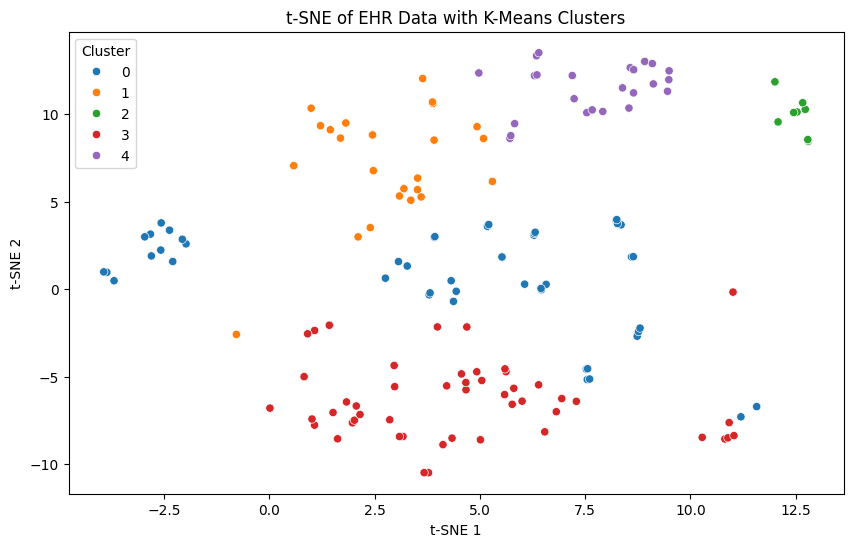

In [34]:


# Step 1: Load dataset from OpenML
diabetes_data = openml.datasets.get_dataset(43569)  # Diabetes 130-US hospitals
df, _, _, _ = diabetes_data.get_data(dataset_format="dataframe")

print("Available columns in the dataset:")
print(df.columns)

# Step 2: Select all numeric features for clustering
data = df.select_dtypes(include=['number']).dropna()

# Step 3: Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 4: Dimensionality reduction
pca_model = PCA(n_components=10, random_state=42)
pca = pca_model.fit_transform(X_scaled)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42).fit_transform(pca)

# Step 5: Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Added n_init for KMeans
clusters = kmeans.fit_predict(pca)

# Step 6: Visualize t-SNE + clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=clusters, palette='tab10')
plt.title("t-SNE of EHR Data with K-Means Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.show()

## Perform PCA

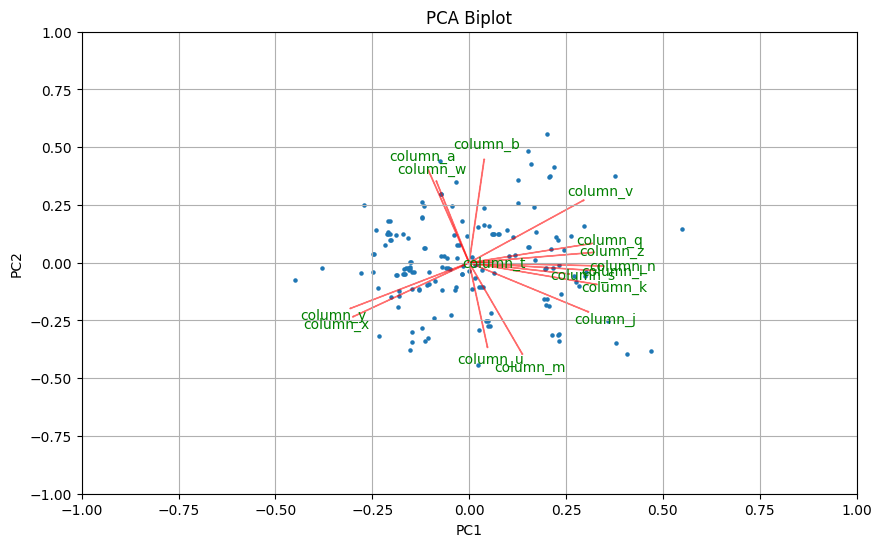

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create a PCA biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min()) # Fixed typo: should be ys.min()

    plt.figure(figsize=(10, 6))
    plt.scatter(xs * scalex, ys * scaley, s=5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title("PCA Biplot")
    plt.grid()

# Get the feature names from the 'data' DataFrame
feature_names = data.columns

# Assuming 'pca' object from the previous cell contains the fitted PCA results
# and 'data' dataframe contains the original data used for PCA
# Create the biplot using the first two principal components
biplot(pca[:, 0:2], np.transpose(pca_model.components_[0:2, :]), labels=feature_names) # pca_model is not defined, should use pca object

plt.show()

## References

[1] https://archive.ics.uci.edu/dataset/34/diabetes